In [2]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [6]:
# Assign meaningful column names to the DataFrame based on the dataset's features
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash',
                'Alcalinity of ash','Magnesium', 'Total phenols',
                'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                'Color intensity','Hue',
                'OD280/OD315 of diluted wines','Proline'
               ]
# Display the first 5 rows of the DataFrame to verify correct data loading and formatting
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
from sklearn.model_selection import train_test_split
X= df_wine.iloc[:,1:].values # Features
y = df_wine.iloc[:,0].values # Target labels
test_size = 0.4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size, random_state=48)
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 106 samples
Test set size: 72 samples


In [54]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [56]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat.shape


(13, 13)

In [58]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.93174584 2.54081759 1.45419233 0.98421363 0.80643233 0.65934447
 0.49764275 0.09866329 0.1552724  0.16986918 0.23650592 0.28310217
 0.30600763]


In [60]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

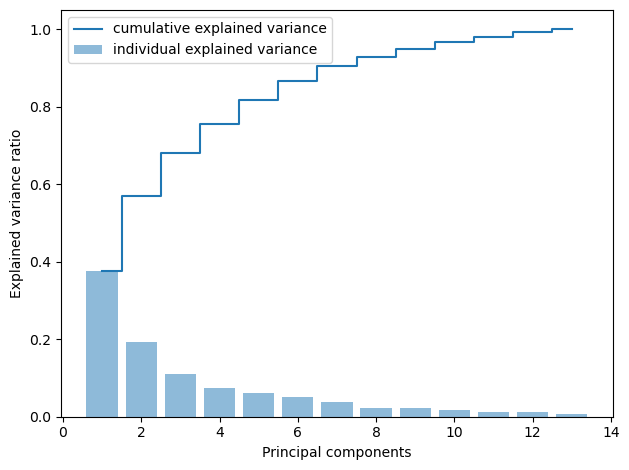

In [62]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.931745839386636,
  array([ 0.2068524 , -0.23588262,  0.01320762, -0.25059327,  0.16775155,
          0.37528062,  0.41131162, -0.31410279,  0.30235781, -0.01850476,
          0.27683532,  0.35804301,  0.32433138])),
 (2.5408175862716016,
  array([-0.44999614, -0.26461409, -0.40040437, -0.09342418, -0.24188373,
         -0.0575222 ,  0.02435365, -0.082151  , -0.06295001, -0.51408867,
          0.31248174,  0.17134121, -0.3066271 ])),
 (1.4541923318211152,
  array([-0.21479522,  0.09483802,  0.52595122,  0.61191108,  0.04086907,
          0.15971348,  0.16740982,  0.1927546 ,  0.2590579 , -0.22913232,
          0.13985228,  0.19168701, -0.15979567])),
 (0.9842136332661,
  array([-0.1535907 , -0.14202687,  0.1514938 , -0.00402794,  0.78833676,
         -0.28323881, -0.20928134, -0.19000433, -0.14841132, -0.21363978,
          0.20448433, -0.16572805,  0.1213457 ])),
 (0.8064323346752085,
  array([-0.04230626,  0.62188462, -0.17665749,  0.05235705,  0.1521067 ,
         -0.01544505,  0

In [66]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 0.2068524  -0.44999614]
 [-0.23588262 -0.26461409]
 [ 0.01320762 -0.40040437]
 [-0.25059327 -0.09342418]
 [ 0.16775155 -0.24188373]
 [ 0.37528062 -0.0575222 ]
 [ 0.41131162  0.02435365]
 [-0.31410279 -0.082151  ]
 [ 0.30235781 -0.06295001]
 [-0.01850476 -0.51408867]
 [ 0.27683532  0.31248174]
 [ 0.35804301  0.17134121]
 [ 0.32433138 -0.3066271 ]]


In [68]:
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)
X_train_pca.shape

(106, 2)

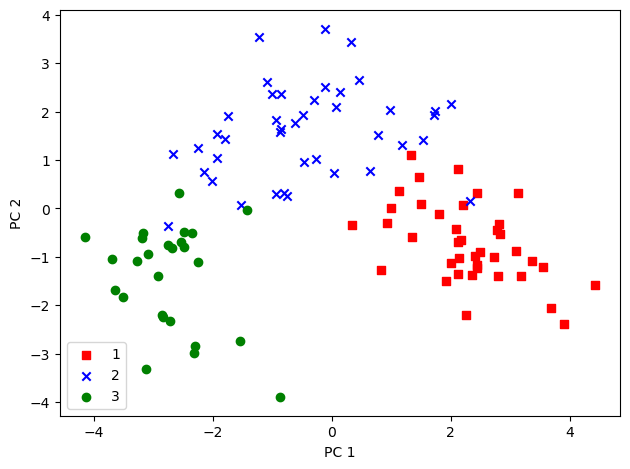

In [70]:
import matplotlib.pyplot as plt

colors = ['r', 'b', 'g']  # Red, Blue, Green for class distinction
markers = ['s', 'x', 'o']  # Square, Cross, Circle for class distinction

for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], c=color, label=label, marker=marker)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [72]:
from sklearn import svm
from sklearn import metrics
import time

start_time = time.time()
svm_no_pca = svm.SVC(kernel='linear')
svm_no_pca.fit(X_train, y_train)
y_pred_no_pca = svm_no_pca.predict(X_test)
no_pca_time = time.time() - start_time
print("Without PCA - Accuracy:")
print(metrics.accuracy_score(y_test, y_pred_no_pca))
start_time = time.time()
svm_pca = svm.SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)
pca_time = time.time() - start_time
print("\nWith PCA - Accuracy:")
print(metrics.accuracy_score(y_test, y_pred_pca))

print("\nTime Comparison:")
print(f"No PCA: {no_pca_time} seconds, PCA: {pca_time} seconds")

Without PCA - Accuracy:
0.9583333333333334

With PCA - Accuracy:
0.9583333333333334

Time Comparison:
No PCA: 0.0677032470703125 seconds, PCA: 0.0006849765777587891 seconds


In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

clf = svm.SVC(kernel='linear', C=1, random_state=42)

clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print(metrics.accuracy_score(y_test, y_pred))

0.9583333333333334


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_train_std)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Components:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC {i}: {var*100:.2f}%")

Explained Variance by Principal Components:
PC 1: 37.58%
PC 2: 19.36%
PC 3: 11.08%
PC 4: 7.50%
PC 5: 6.14%
PC 6: 5.02%
PC 7: 3.79%
PC 8: 2.33%
PC 9: 2.16%
PC 10: 1.80%
PC 11: 1.29%
PC 12: 1.18%
PC 13: 0.75%


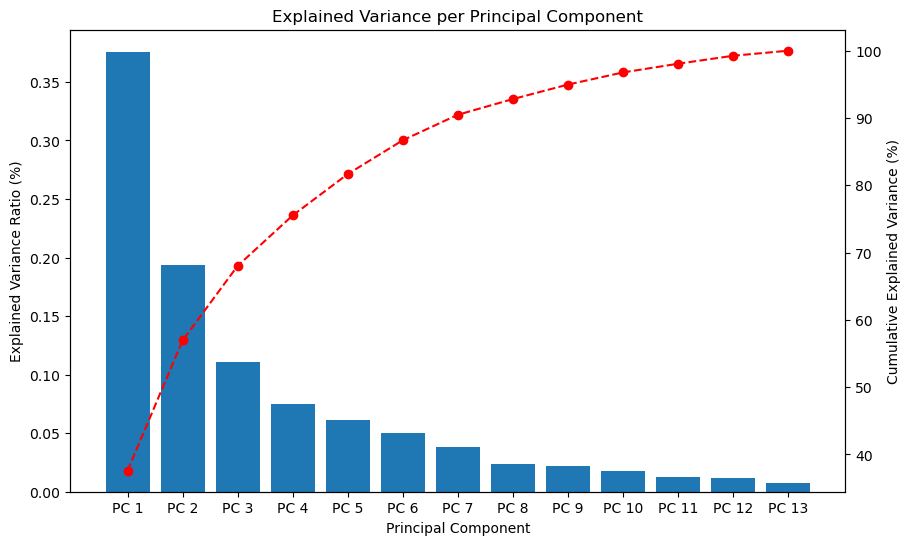

In [78]:
import matplotlib.pyplot as plt
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, tick_label=[f'PC {i}' for i in range(1, len(explained_variance)+1)])
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Component')

plt.twinx()
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance*100, color='r', marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance per Principal Component')
plt.show()